<a href="https://colab.research.google.com/github/SarathiSoundarya/ML_Codes/blob/main/linregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Closed Form of Linear Regression**
The least squared cost function for linear regression for $n$ samples in $d$ dimensions is given by<br />
$J(w)=\sum_{i=1}^{m}((w\cdot x^{i} )-y^{i})^2$ where $w=(w_{1},w_{2},..,w_{d},b)$ $x^{i}=(x^{i}_{1},x^{i}_{2},..,x^{i}_{d},1)$ or<br />
$J(w)=||XW-Y||^2=(XW-Y)^T(XW-Y)$ where <br />
$X$ is a $m$ x $d$ matrix and $w$ is $d$ dimensional vector.
$\frac{\partial J}{\partial w}=0 \implies
w^{*}=(X^{t}X)^{-1}X^{T}Y$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from numpy.linalg import inv

In [2]:
class linregclosed:
  
  def __init__(self, learning_rate=0.01, n_iters=1000,dim=2):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = np.zeros((1,dim+1))
  
  def update(self,dw,db):
    self.weights-=self.lr*dw
    self.bias-=self.lr*db


  def fit(self, xtr, ytr, xte, ytest):
     #initializations
     n_samples,n_features=xtr.shape
     ytr=np.where(ytr==0,-1,1)
     ytest=np.where(ytest==0,-1,1)
     ytest=ytest.reshape((1,xte.shape[0]))
     x=np.hstack((xtr,np.ones((n_samples,1))))
     m=np.dot(inv(np.dot(x.T,x)),x.T)
     w=np.dot(m,ytr.T)
     self.weights=w.reshape((1,n_features+1))
    

     #plotting
     a_max = np.amax(x[:,0])
     a_min = np.amin(x[:,0])
     xpts = np.linspace(a_min,a_max)
     ypts = -(self.weights[0][0]*xpts+self.weights[0][2] )/self.weights[0][1]
     ax.plot(xpts, ypts)
     
    #testing the accuracy on the test data
     xtest=np.hstack((xte,np.ones((xte.shape[0],1))))
     y_p=np.dot(self.weights,xtest.T)
     y_p=np.where(y_p>0,1,-1)
     accuracy=np.count_nonzero(ytest==y_p)/xtest.shape[0]

     #cost on the training data
     y_predict=np.dot(self.weights,x.T)
     cost=(1/2*n_samples)*(np.sum(np.square(ytr-y_predict)))
     return cost,accuracy

**Linear regression using Gradient Descent**<br />
The least squared cost function for linear regression for $n$ samples in $d$ dimensions is given by<br />
$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}((w\cdot x^{i}+b)-y^{i})^2$ <br />
$\frac{∂ J}{\partial w_{j}}=\frac{1}{m}\sum_{i=1}^{m}((w\cdot x^{i}+b)-y^{i})x^{i}_{j}$<br />
$\frac{∂ J}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}((w\cdot x^{i}+b)-y^{i})$<br />
$w_{j}=w_{j}-\alpha\frac{∂ J}{\partial w_{j}}$<br />
$b=b-\alpha\frac{∂ J}{\partial b}$

In [3]:
class linregrad: 
    def __init__(self,n_features,n_samples,learning_rate=0.01,n_iters=1000):
        self.lr = learning_rate
        self.n_samples=n_samples
        self.n_features=n_features 
        self.n_iters = n_iters
        self.weights = np.zeros((1,n_features))
        self.bias = 0 
    
    def y_predict(self,x):
        return np.dot(self.weights,x.T)+self.bias
    
    def gradientdescent(self,x,error):
        dw=(1/self.n_samples)*np.dot(error,x)
        #print('dw:',dw,dw.shape)
        db=(1/self.n_samples)*np.sum(error)
        return dw,db
        
    def updateparam(self,dw,db):
        self.weights-=self.lr*dw
        self.bias-=self.lr*db
   
    def fit(self,x,y,xtest,ytest):
      cost_list=[]
      accuracy=[]
      y=np.where(y==0,-1,1)
      ytest=np.where(ytest==0,-1,1)
      ytest=ytest.reshape((1,xtest.shape[0]))
      for i in range(self.n_iters):
        y_predict=self.y_predict(x)
        error=y_predict-y
        cost=(1/2*self.n_samples)*(np.sum(np.square(error)))
        dw,db=self.gradientdescent(x,error)
        self.updateparam(dw,db)
        cost_list.append(cost)
        #plotting at every 100th iteration 
        
        if(i%500==0):
          a_max = np.amax(x[:,0])
          a_min = np.amin(x[:,0])
          xpts = np.linspace(a_min,a_max)
          ypts = -(self.weights[0][0]*xpts + self.bias)/self.weights[0][1]
          ax.plot(xpts, ypts,label=i)
          plt.legend()
          
        #testing the accuracy on the test data
        y_p=np.dot(self.weights,xtest.T)+self.bias
        y_p=np.where(y_p>0,1,-1)
        acc=np.count_nonzero(ytest==y_p)/xtest.shape[0]
        accuracy.append(acc)
        cost_list.append(cost)
      
      return cost_list,accuracy


COST LIST, WEIGHTS AND ACUURACY FOR LINEAR REGRESSION CLOSED FORM
weights,bias: [[0.06351493 0.21246613 1.17027545]]
final cost, accuracy: 17791.307607634262 1.0


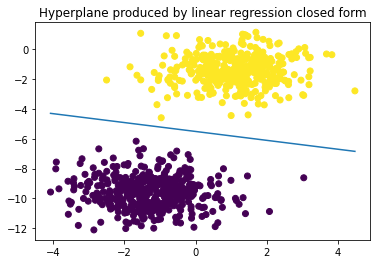

COST LIST, WEIGHTS AND ACUURACY FOR LINEAR REGRESSION CLOSED FORM
weights,bias: [[0.06420385 0.21212499]] 1.1679783511663264
final cost, accuracy: 17791.692944163333 1.0


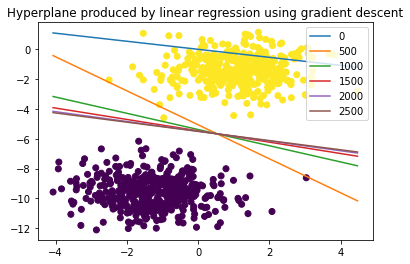

In [4]:
x,y=datasets.make_blobs(n_samples=1000, n_features=2,centers=2, cluster_std=1.05, random_state=2)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# LINEAR REGRESSION CLOSED
lrc=linregclosed(0.01,500,2)
#plotting
fig, ax = plt.subplots()
plt.scatter(xtrain[:,0], xtrain[:,1],marker="o", c=ytrain)

#linclose fit
cost_lrc,accuracy_lrc=lrc.fit(xtrain,ytrain,xtest,ytest)
print('COST LIST, WEIGHTS AND ACUURACY FOR LINEAR REGRESSION CLOSED FORM')
print("weights,bias:", lrc.weights)
print('final cost, accuracy:',cost_lrc,accuracy_lrc)

#plot the hyperplane
plt.title('Hyperplane produced by linear regression closed form')
plt.show()

#LINEAR REGRESSION GRADIENT
lrg=linregrad(xtrain.shape[1],xtrain.shape[0],0.01,3000)
#plotting
fig, ax = plt.subplots()
plt.scatter(xtrain[:,0], xtrain[:,1],marker="o", c=ytrain)

#linclose fit
cost_lrg,accuracy_lrg=lrg.fit(xtrain,ytrain,xtest,ytest)
print('COST LIST, WEIGHTS AND ACUURACY FOR LINEAR REGRESSION CLOSED FORM')
print("weights,bias:", lrg.weights,lrg.bias)
print('final cost, accuracy:',cost_lrg[-1],accuracy_lrg[-1])

#plot the hyperplane
plt.title('Hyperplane produced by linear regression using gradient descent')
plt.show()
